# Procesado

In [1]:
import os
import json
import traceback
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal
from tqdm import tqdm 
from sklearn.preprocessing import StandardScaler


In [2]:
# Carga de los datos

# Lista para almacenar los datos de todos los archivos
data = []

try:
    # Obtener la lista de archivos en la carpeta preprocessed
    carpeta_preprocessed = '../Data/Preprocessed/'
    archivos_preprocessed = os.listdir(carpeta_preprocessed)
    
    # Iterar sobre cada archivo
    for archivo in archivos_preprocessed:
        # Construir la ruta completa del archivo
        ruta_archivo = os.path.join(carpeta_preprocessed, archivo)
        
        # Leer el contenido del archivo JSON
        with open(ruta_archivo, 'r') as f:
            datos_archivo = json.load(f)
        
        # Agregar los datos del archivo a la lista de datos totales
        data.append(datos_archivo)
        
        print(f"Datos cargados exitosamente desde '{ruta_archivo}'.")
    
    print(f"Datos cargados exitosamente desde la carpeta preprocessed.")
    
except Exception as e:
    print(f"Error al cargar los datos desde {ruta_archivo}.")
    traceback.print_exc()

Datos cargados exitosamente desde '../Data/Preprocessed/S001R003.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R004.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R005.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R006.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R007.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R008.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R009.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R010.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R011.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R012.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R013.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S001R014.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S002R003.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S002R004

Datos cargados exitosamente desde '../Data/Preprocessed/S010R010.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S010R011.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S010R012.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S010R013.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S010R014.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R003.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R004.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R005.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R006.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R007.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R008.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R009.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R010.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S011R011

Datos cargados exitosamente desde '../Data/Preprocessed/S020R004.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R005.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R006.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R007.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R008.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R009.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R010.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R011.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R012.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R013.json'.
Datos cargados exitosamente desde '../Data/Preprocessed/S020R014.json'.
Datos cargados exitosamente desde la carpeta preprocessed.


In [3]:
len(data[10][0])
#data[10][0][-1]

9600

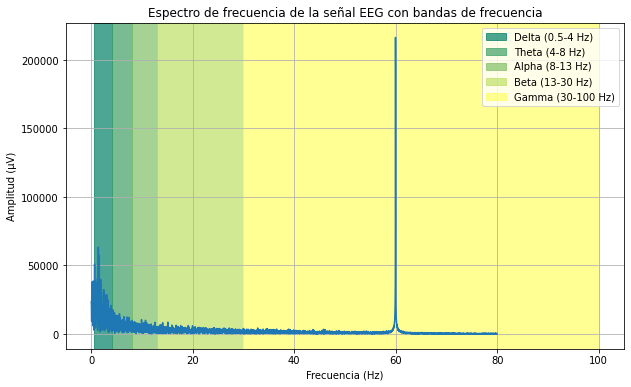

In [16]:

eeg_signal = data[49][0]

# Generar una señal EEG de ejemplo
fs = 160  # Frecuencia de muestreo (Hz)
t = np.arange(0, 10, 1/fs)  # Vector de tiempo de 0 a 10 segundos
#f1 = 10  # Frecuencia de la señal en Hz
#eeg_signal = np.sin(2 * np.pi * f1 * t)  # Señal EEG simulada

# Calcular la transformada de Fourier de la señal
fft_result = np.fft.fft(eeg_signal)
freqs = np.fft.fftfreq(len(eeg_signal), 1/fs)

# Definir las bandas de frecuencia típicas para el EEG
bands = {'Delta': (0.5, 4),
         'Theta': (4, 8),
         'Alpha': (8, 13),
         'Beta': (13, 30),
         'Gamma': (30, 100)}

# Crear un mapa de colores (colormap) gradual
#colors = cm.viridis(np.linspace(0, 1, len(bands)))
#colors = cm.cividis(np.linspace(0, 1, len(bands)))
#colors = cm.plasma(np.linspace(0, 1, len(bands)))
#colors = cm.inferno(np.linspace(0, 1, len(bands)))
#colors = cm.coolwarm(np.linspace(0, 1, len(bands)))
#colors = cm.spring(np.linspace(0, 1, len(bands)))
#colors = cm.magma(np.linspace(0, 1, len(bands)))
#colors = cm.inferno(np.linspace(0, 1, len(bands)))
colors = cm.summer(np.linspace(0, 1, len(bands)))


# Graficar la magnitud de la FFT (espectro de frecuencia) y las bandas de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])  # Solo mostramos la mitad de las frecuencias (positivas)
for i, (band, (low, high)) in enumerate(bands.items()):
    color = colors[i]
    plt.axvspan(low, high, color=color, alpha=0.7, label=f'{band} ({low}-{high} Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (µV)')
plt.title('Espectro de frecuencia de la señal EEG con bandas de frecuencia')
plt.legend()
plt.grid(True)
plt.show()

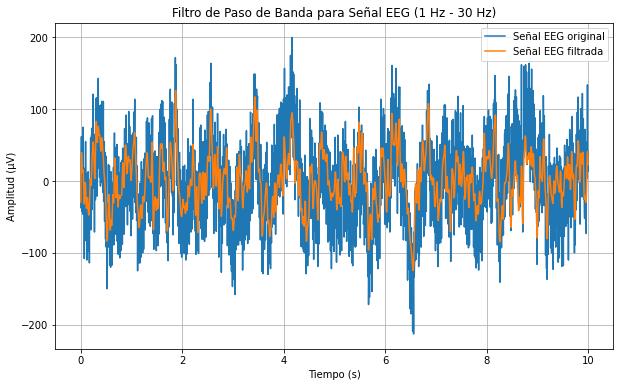

In [5]:
# Frecuencia de muestreo (en Hz)
fs = 160

# Vector de tiempo de 10 segundos
t = np.linspace(0, 10, 10*fs, endpoint=False)

# Frecuencias de corte del filtro de paso de banda
frecuencia_baja = 1
frecuencia_alta = 30

# Diseñar el filtro de paso de banda
orden_filtro = 4  # Orden del filtro
frecuencia_nyquist = 0.5 * fs  # Frecuencia de Nyquist
frecuencia_corte = [frecuencia_baja / frecuencia_nyquist, frecuencia_alta / frecuencia_nyquist]
b, a = signal.butter(orden_filtro, frecuencia_corte, btype='band')

# Aplicar el filtro a la señal EEG
eeg_filtrada = signal.filtfilt(b, a, eeg_signal)

# Graficar una porción de la señal EEG original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, eeg_signal[:len(t)], label='Señal EEG original')
plt.plot(t, eeg_filtrada[:len(t)], label='Señal EEG filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.title(F'Filtro de Paso de Banda para Señal EEG ({frecuencia_baja} Hz - {frecuencia_alta} Hz)')
plt.legend()
plt.grid(True)
plt.show()

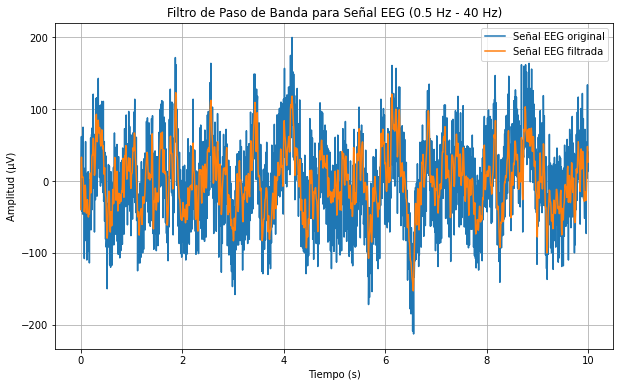

In [6]:
# Frecuencia de muestreo
fs = 160

# Vector de tiempo de 10 segundos
t = np.linspace(0, 10, 10*fs, endpoint=False)

# Frecuencias de corte del filtro de paso de banda
frecuencia_baja = 0.5
frecuencia_alta = 40

# Filtro de paso de banda
orden_filtro = 4  # Orden del filtro
frecuencia_nyquist = 0.5 * fs  # Frecuencia de Nyquist
frecuencia_corte = [frecuencia_baja / frecuencia_nyquist, frecuencia_alta / frecuencia_nyquist]
b, a = signal.butter(orden_filtro, frecuencia_corte, btype='band')

# Aplicar el filtro a la señal EEG
eeg_filtrada = signal.filtfilt(b, a, eeg_signal)

# Recortar el vector de tiempo para que tenga la misma longitud que eeg_filtrada
t_recortado = t[:len(eeg_filtrada)]

# Graficar una porción de la señal EEG original y la señal filtrada
plt.figure(figsize=(10, 6))
#plt.plot(t_recortado, eeg_signal[:len(eeg_filtrada)], label='Señal EEG original')
#plt.plot(t_recortado, eeg_filtrada, label='Señal EEG filtrada')
plt.plot(t, eeg_signal[:len(t)], label='Señal EEG original')
plt.plot(t, eeg_filtrada[:len(t)], label='Señal EEG filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.title(f'Filtro de Paso de Banda para Señal EEG ({frecuencia_baja} Hz - {frecuencia_alta} Hz)')
plt.legend()
plt.grid(True)
plt.show()

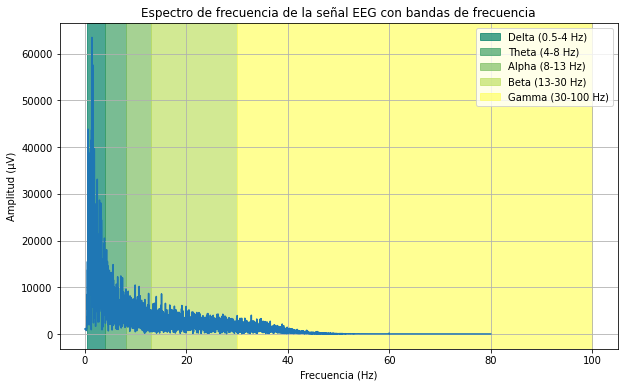

In [15]:
# Generar una señal EEG de ejemplo
fs = 160  # Frecuencia de muestreo (Hz)
t = np.arange(0, 10, 1/fs)  # Vector de tiempo de 0 a 10 segundos

# Calcular la transformada de Fourier de la señal
fft_result = np.fft.fft(eeg_filtrada)
freqs = np.fft.fftfreq(len(eeg_filtrada), 1/fs)

# Definir las bandas de frecuencia típicas para el EEG
bands = {'Delta': (0.5, 4),
         'Theta': (4, 8),
         'Alpha': (8, 13),
         'Beta': (13, 30),
         'Gamma': (30, 100)}

# Crear un mapa de colores (colormap) gradual
#colors = cm.viridis(np.linspace(0, 1, len(bands)))
#colors = cm.cividis(np.linspace(0, 1, len(bands)))
#colors = cm.plasma(np.linspace(0, 1, len(bands)))
#colors = cm.inferno(np.linspace(0, 1, len(bands)))
#colors = cm.coolwarm(np.linspace(0, 1, len(bands)))
#colors = cm.spring(np.linspace(0, 1, len(bands)))
#colors = cm.magma(np.linspace(0, 1, len(bands)))
#colors = cm.inferno(np.linspace(0, 1, len(bands)))
colors = cm.summer(np.linspace(0, 1, len(bands)))


# Graficar la magnitud de la FFT (espectro de frecuencia) y las bandas de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])  # Solo mostramos la mitad de las frecuencias (positivas)
for i, (band, (low, high)) in enumerate(bands.items()):
    color = colors[i]
    plt.axvspan(low, high, color=color, alpha=0.7, label=f'{band} ({low}-{high} Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (µV)')
plt.title('Espectro de frecuencia de la señal EEG con bandas de frecuencia')
plt.legend()
plt.grid(True)
plt.show()

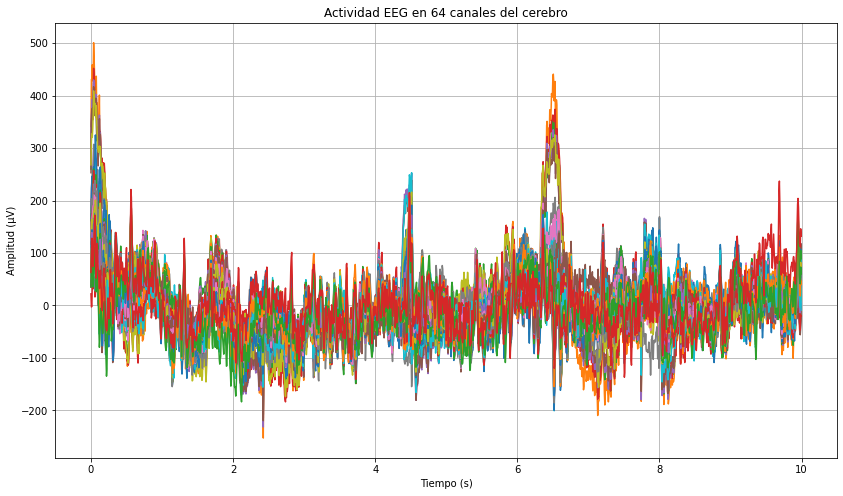

In [8]:
eeg_channels = data[10]

fs = 160
t = np.linspace(0, 10, 10*fs, endpoint=False)

# Graficar las señales EEG para los 64 canales del cerebro
plt.figure(figsize=(14, 8))  # Ajustar tamaño de la figura según necesidades
for i, channel in enumerate(eeg_channels):
    channel = channel[:len(t)]
    plt.plot(t, channel, label=f'Canal {i+1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.title('Actividad EEG en 64 canales del cerebro')
#plt.legend(loc='upper right', fontsize='small')  # Ajustar la ubicación y tamaño de la leyenda
plt.grid(True)
plt.show()


## Aplicamos el filtrado y normalizado a todo el cojunto de datos

In [9]:
eeg_data = [] 

# Frecuencia de muestreo
fs = 160

# Vector de tiempo de 10 segundos
t = np.linspace(0, 10, 10*fs, endpoint=False)

# Frecuencias de corte del filtro de paso de banda
frecuencia_baja = 0.5
frecuencia_alta = 40

# Filtro de paso de banda
orden_filtro = 4  # Orden del filtro
frecuencia_nyquist = 0.5 * fs  # Frecuencia de Nyquist
frecuencia_corte = [frecuencia_baja / frecuencia_nyquist, frecuencia_alta / frecuencia_nyquist]
# Normalizar las frecuencias de corte
#frecuencia_corte_normalized = [f / frecuencia_nyquist for f in frecuencia_corte]
#b, a = signal.butter(orden_filtro, frecuencia_corte_normalized, btype='band')

# Calcula las frecuencias normalizadas
frecuencia_baja_normalizada = frecuencia_baja / (0.5 * fs)
frecuencia_alta_normalizada = frecuencia_alta / (0.5 * fs)

# Diseñar el filtro de Butterworth
b, a = signal.butter(orden_filtro, [frecuencia_baja_normalizada, frecuencia_alta_normalizada], btype='bandpass')


# Iterar sobre los registros de EEG con una barra de progreso
for registro in tqdm(data, desc="Filtrando registros"):
    eeg_registro_filtrado = []
    for canal in registro:
        #b, a = signal.butter(orden_filtro, frecuencia_corte, btype='band')
        #eeg_registro_filtrado.append(signal.filtfilt(b, a, canal))
        
        # Aplicar el filtro de Butterworth
        canal_filtrado = signal.filtfilt(b, a, canal)
        
        # Normalizar la señal filtrada
        scaler = StandardScaler()
        canal_normalizado = scaler.fit_transform(canal_filtrado.reshape(-1, 1)).flatten()
        
        eeg_registro_filtrado.append(canal_normalizado)
    eeg_data.append(eeg_registro_filtrado)


Filtrando registros: 100%|███████████████████████████████████████████████████████████| 240/240 [01:06<00:00,  3.61it/s]


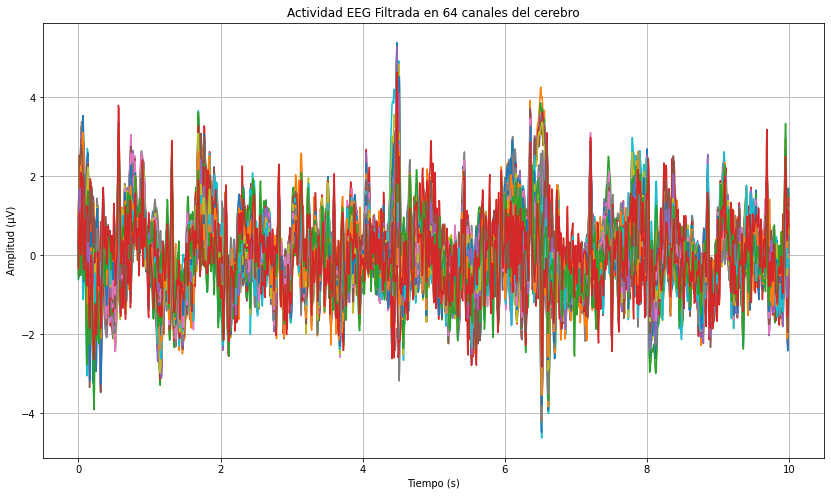

In [10]:
eeg_channels_filtrados = eeg_data[10]

fs = 160
t = np.linspace(0, 10, 10*fs, endpoint=False)

# Graficar las señales EEG filtradas para los 64 canales del cerebro
plt.figure(figsize=(14, 8))  # Ajustar tamaño de la figura según necesidades
for i, channel in enumerate(eeg_channels_filtrados):
    channel = channel[:len(t)]
    plt.plot(t, channel, label=f'Canal {i+1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.title('Actividad EEG Filtrada en 64 canales del cerebro')
#plt.legend(loc='upper right', fontsize='small')  # Ajustar la ubicación y tamaño de la leyenda
plt.grid(True)
plt.show()


### Comparamos la señal original y la filtrada para los 64 canales 

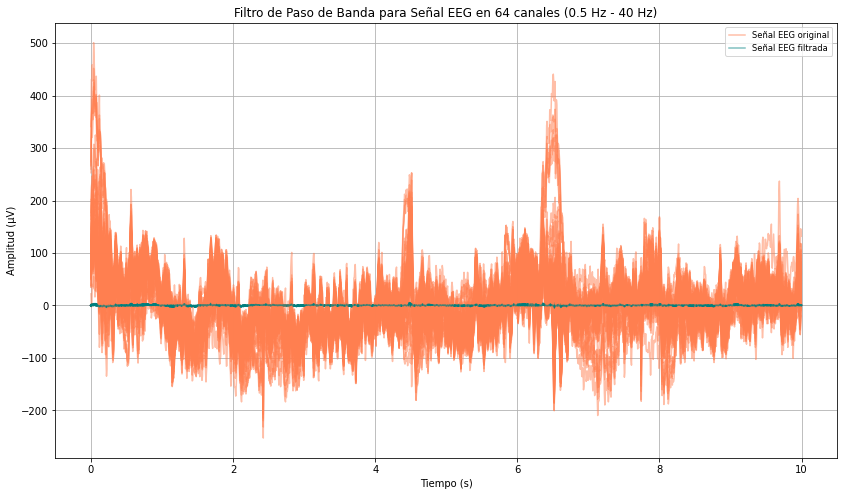

In [11]:
eeg_channels = data[10]
eeg_channels_filtrados = eeg_data[10]

fs = 160
t = np.linspace(0, 10, 10*fs, endpoint=False)

plt.figure(figsize=(14, 8))

color_original = 'coral'
color_filtrado = 'teal'

for i, (channel_orig, channel_filt) in enumerate(zip(eeg_channels, eeg_channels_filtrados)):
    channel_orig = channel_orig[:len(t)]
    channel_filt = channel_filt[:len(t)]
    
    plt.plot(t, channel_orig, color=color_original, alpha=0.5, label=f'Señal EEG original' if i == 0 else "")
    plt.plot(t, channel_filt, color=color_filtrado, alpha=0.5, label=f'Señal EEG filtrada' if i == 0 else "")

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.title(f'Filtro de Paso de Banda para Señal EEG en 64 canales ({frecuencia_baja} Hz - {frecuencia_alta} Hz)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()


In [12]:
# Itera a través de eeg_data para convertir cada elemento en una lista
for i in range(len(eeg_data)):
    for j in range(len(eeg_data[i])):
        eeg_data[i][j] = eeg_data[i][j].tolist()

# Verifica los tipos después de la conversión
print(type(eeg_data))             # <class 'list'>
print(type(eeg_data[0]))          # <class 'list'>
print(type(eeg_data[0][0]))       # <class 'list'>

<class 'list'>
<class 'list'>
<class 'list'>


In [13]:
try:
    patientx = 1
    registerx = 3
    for index, item in enumerate(eeg_data):
        
        file_name = f'../Data/Processed/S{patientx:03}R{registerx:03}_filtered.json'
        with open(file_name, 'w') as archivo:
            json.dump(item, archivo)

        print(f"Datos cargados exitosamente en 'S{patientx:03}R{registerx:03}_filtered.json'.")
        
        if(registerx<14):
            registerx+=1
        else:
            patientx += 1
            registerx = 3
        
    print(f"Todos los datos han sido guardados correctamente.")
    
except Exception as e:
    print(f"Error al guardar los datos: {e}")


Datos cargados exitosamente en 'S001R003_filtered.json'.
Datos cargados exitosamente en 'S001R004_filtered.json'.
Datos cargados exitosamente en 'S001R005_filtered.json'.
Datos cargados exitosamente en 'S001R006_filtered.json'.
Datos cargados exitosamente en 'S001R007_filtered.json'.
Datos cargados exitosamente en 'S001R008_filtered.json'.
Datos cargados exitosamente en 'S001R009_filtered.json'.
Datos cargados exitosamente en 'S001R010_filtered.json'.
Datos cargados exitosamente en 'S001R011_filtered.json'.
Datos cargados exitosamente en 'S001R012_filtered.json'.
Datos cargados exitosamente en 'S001R013_filtered.json'.
Datos cargados exitosamente en 'S001R014_filtered.json'.
Datos cargados exitosamente en 'S002R003_filtered.json'.
Datos cargados exitosamente en 'S002R004_filtered.json'.
Datos cargados exitosamente en 'S002R005_filtered.json'.
Datos cargados exitosamente en 'S002R006_filtered.json'.
Datos cargados exitosamente en 'S002R007_filtered.json'.
Datos cargados exitosamente en 

Datos cargados exitosamente en 'S013R003_filtered.json'.
Datos cargados exitosamente en 'S013R004_filtered.json'.
Datos cargados exitosamente en 'S013R005_filtered.json'.
Datos cargados exitosamente en 'S013R006_filtered.json'.
Datos cargados exitosamente en 'S013R007_filtered.json'.
Datos cargados exitosamente en 'S013R008_filtered.json'.
Datos cargados exitosamente en 'S013R009_filtered.json'.
Datos cargados exitosamente en 'S013R010_filtered.json'.
Datos cargados exitosamente en 'S013R011_filtered.json'.
Datos cargados exitosamente en 'S013R012_filtered.json'.
Datos cargados exitosamente en 'S013R013_filtered.json'.
Datos cargados exitosamente en 'S013R014_filtered.json'.
Datos cargados exitosamente en 'S014R003_filtered.json'.
Datos cargados exitosamente en 'S014R004_filtered.json'.
Datos cargados exitosamente en 'S014R005_filtered.json'.
Datos cargados exitosamente en 'S014R006_filtered.json'.
Datos cargados exitosamente en 'S014R007_filtered.json'.
Datos cargados exitosamente en 

## Explicación de los ordenes del filtro

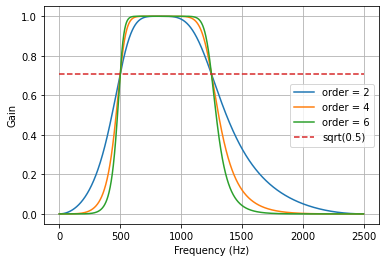

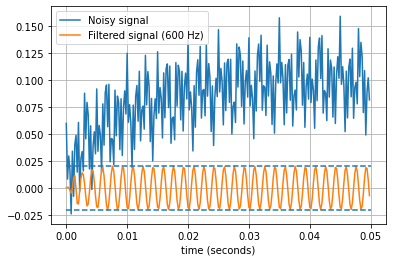

In [14]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [2, 4, 6]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, fs=fs, worN=2000)
        plt.plot(w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.arange(0, nsamples) / fs
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()